# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn import metrics

from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# **Data Reading and Exploration**

In [2]:
traindf = pd.read_csv("application_train.csv")
testdf = pd.read_csv("application_test.csv")

In [3]:
traindf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
traindf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,5789.000000,5789.000000,5789.000000,5.789000e+03,5.789000e+03,5789.000000,5.788000e+03,5789.000000,5789.000000,5789.000000,...,5788.000000,5788.000000,5788.000000,5788.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000
mean,103382.811194,0.077388,0.409052,1.674310e+05,5.964398e+05,26963.432544,5.365435e+05,0.020956,-16036.983762,64291.327345,...,0.006738,0.000346,0.000518,0.000346,0.008383,0.009381,0.036327,0.268663,0.276048,1.880040
std,1955.892221,0.267229,0.712142,9.641043e+04,4.028999e+05,14379.329523,3.700715e+05,0.014046,4325.376169,141687.944890,...,0.081816,0.018587,0.022763,0.018587,0.093348,0.134459,0.205431,0.927431,0.621891,1.854398
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101702.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16389.000000,2.385000e+05,0.010006,-19594.000000,-2800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103375.000000,0.000000,0.000000,1.440000e+05,5.084955e+05,24885.000000,4.500000e+05,0.018850,-15822.000000,-1212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,105079.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34573.500000,6.795000e+05,0.028663,-12451.000000,-298.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,106768.000000,1.000000,7.000000,1.935000e+06,2.517300e+06,135936.000000,2.254500e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


In [5]:
traindf.isnull().sum().sort_values(ascending=False)

COMMONAREA_MODE             3990
COMMONAREA_AVG              3990
COMMONAREA_MEDI             3990
NONLIVINGAPARTMENTS_MODE    3970
NONLIVINGAPARTMENTS_AVG     3970
                            ... 
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
AMT_ANNUITY                    0
SK_ID_CURR                     0
Length: 122, dtype: int64

## Using Balanced Datasets

In [6]:
# use balanced dataset for analysis
balanceddf = pd.concat((traindf[traindf["TARGET"]==1], traindf[traindf["TARGET"]==0].sample(n=traindf[traindf["TARGET"]==1].shape[0])))

# **EDA & Visualization**

Histograms of dataset


<ipython-input-7-3acda7248184>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(traindf[h].dropna(), palette='Blues_r')
<ipython-input-7-3acda7248184>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(traindf[h].dropna(), palette='Blues_r')
<ipython-input-7-3acda7248184>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(traindf[h].dropna(), palette='Blues_r')
<ipython-input-7-3acda7248184>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(traindf[h].dropna(), palette='Blues_r')
<ipython-input-7-3acda7248184>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(traindf[h].dropna(), palette='Blues_r')
<ipython-input-7-3acda7248184>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(traindf[h].dropna(), palette='Blues_r')
<ipy

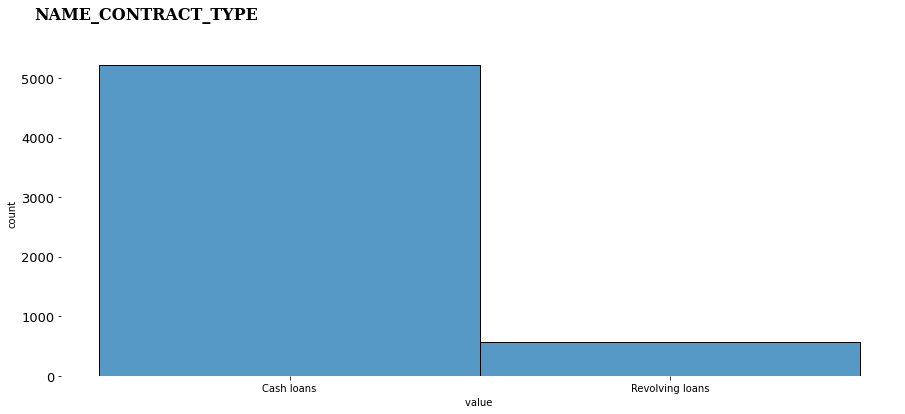

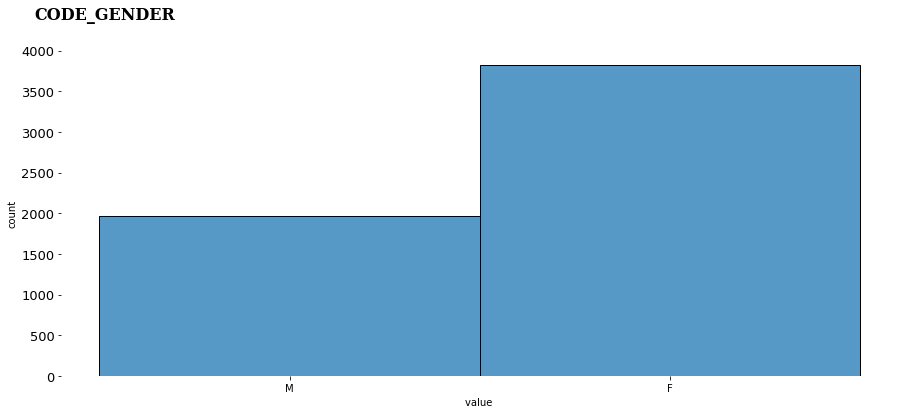

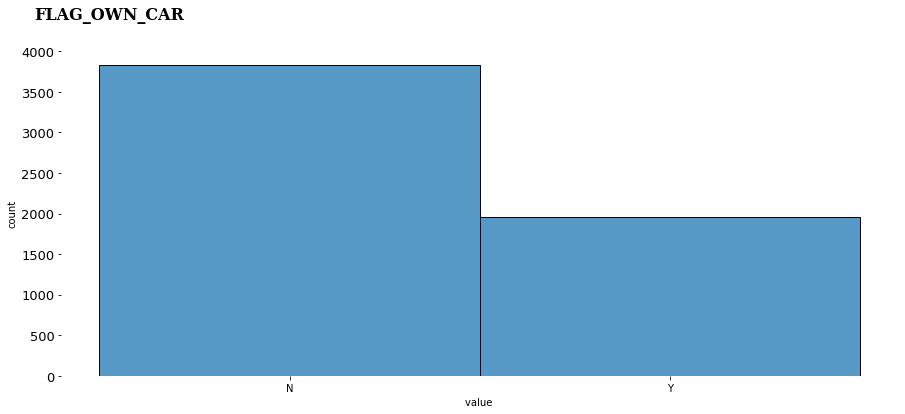

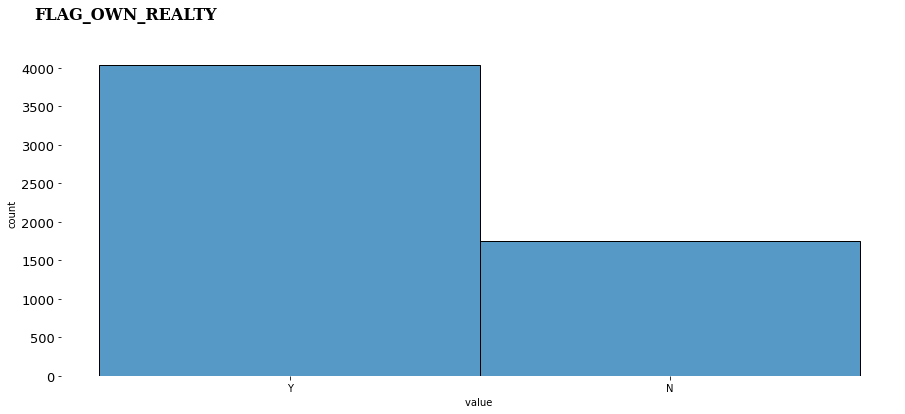

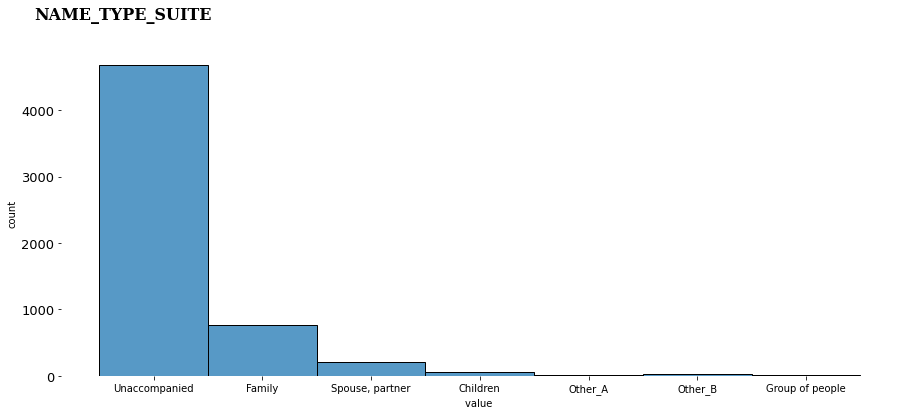

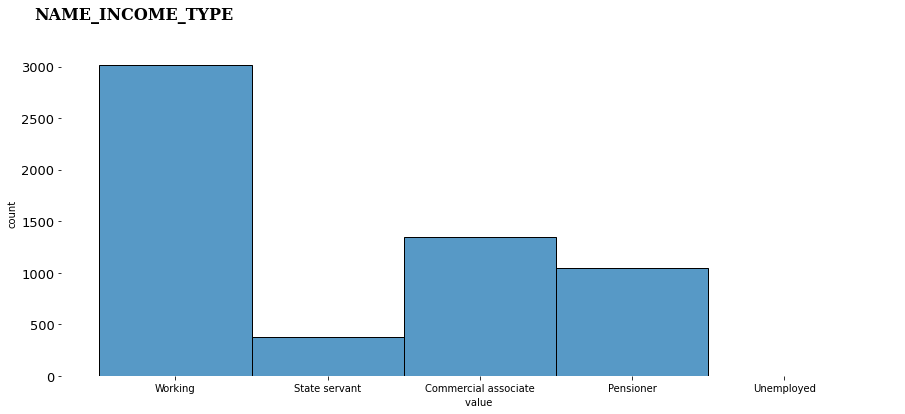

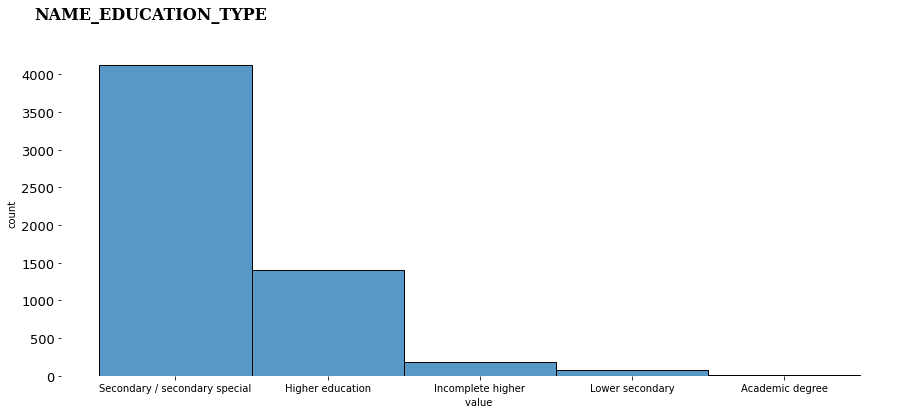

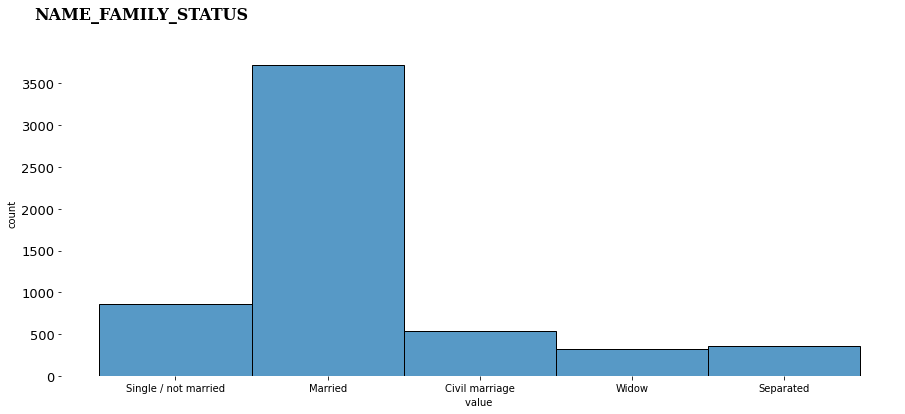

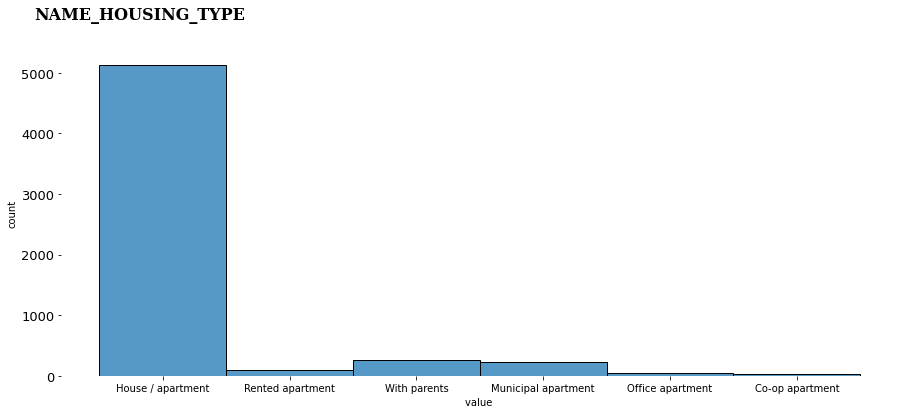

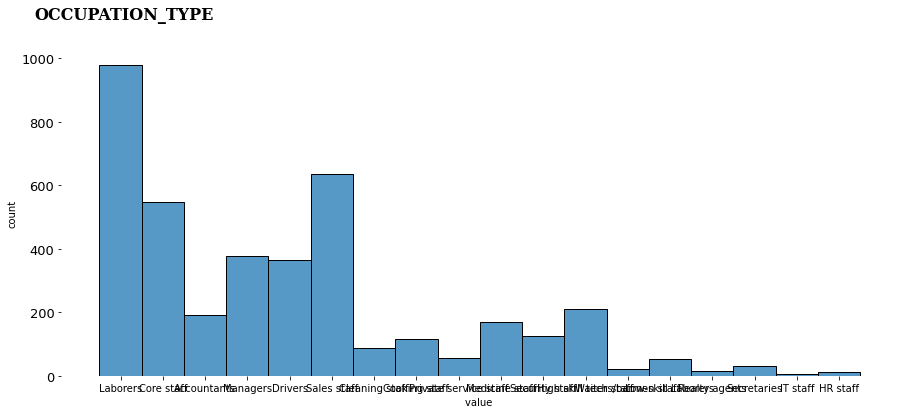

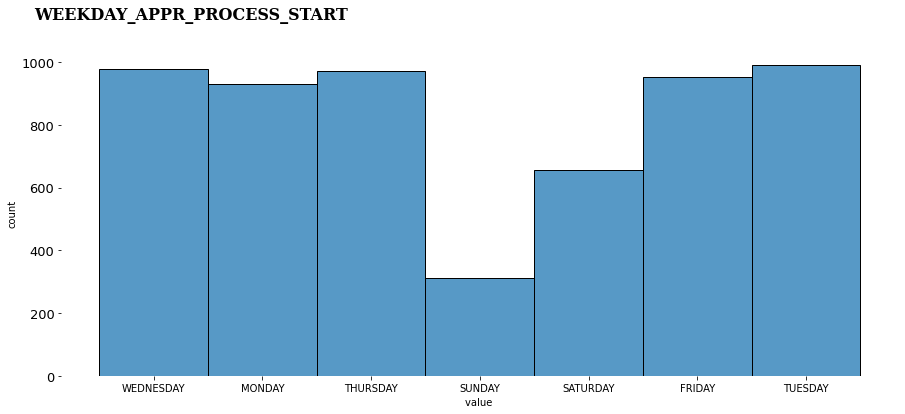

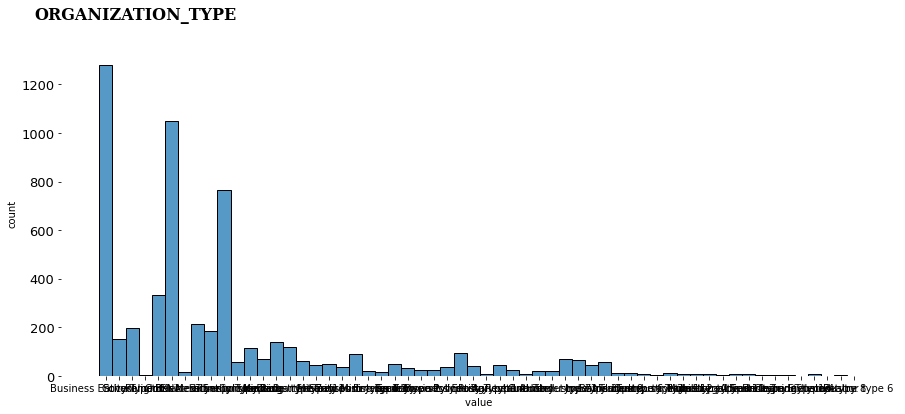

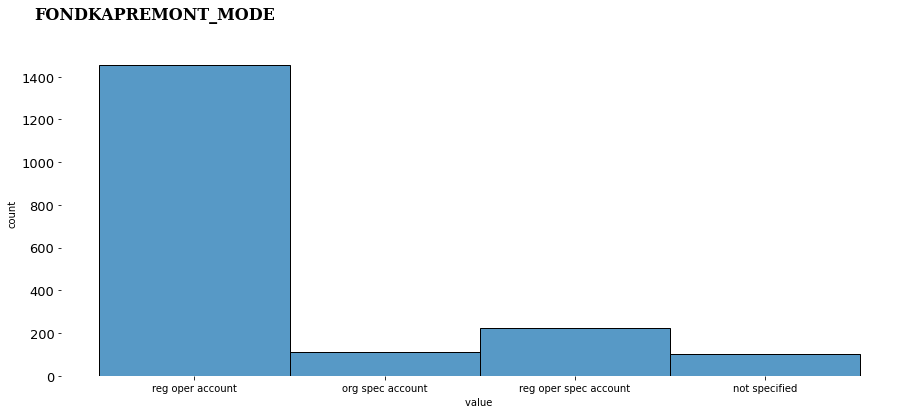

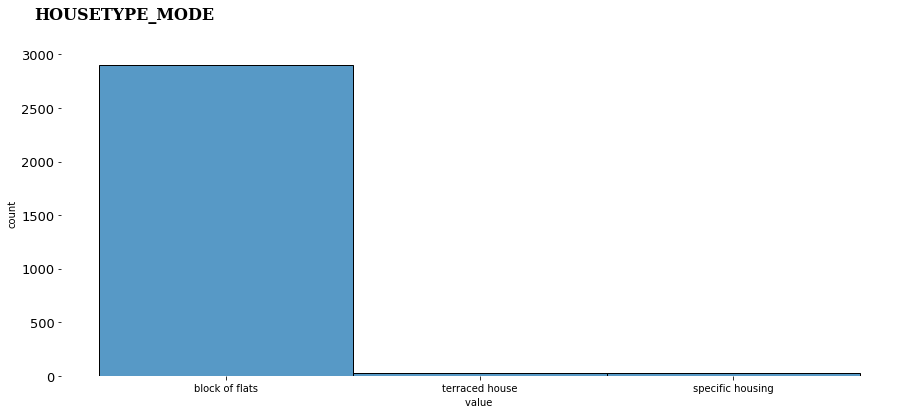

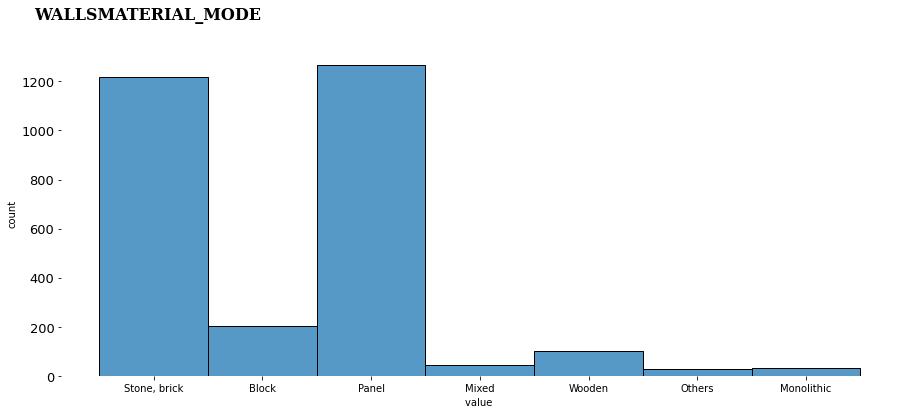

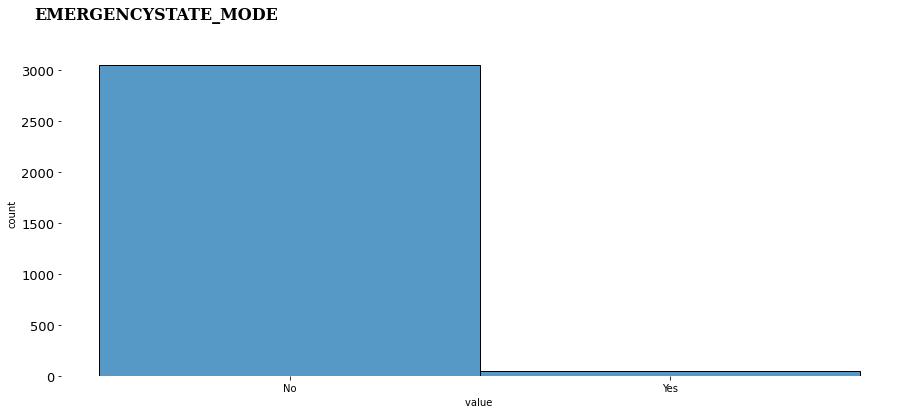

In [7]:
print("Histograms of dataset")
for h in traindf.select_dtypes("object").columns:
    if(traindf[h].nunique() < 100):
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.histplot(traindf[h].dropna(), palette='Blues_r')
        fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
        plt.box(False)

Histograms with Classes portions


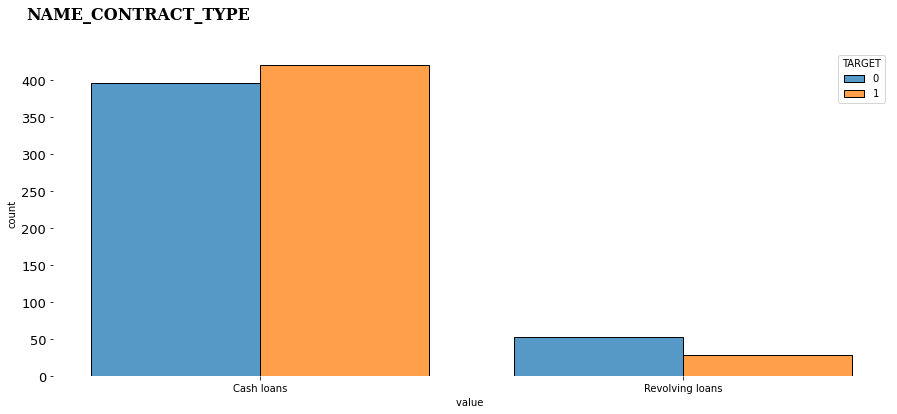

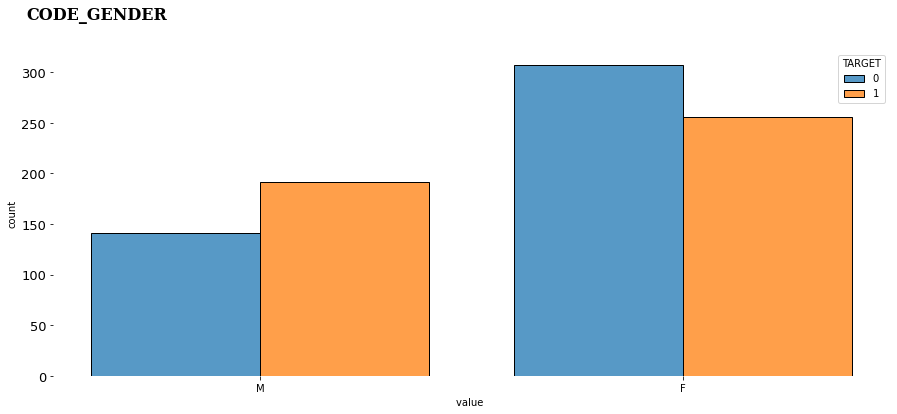

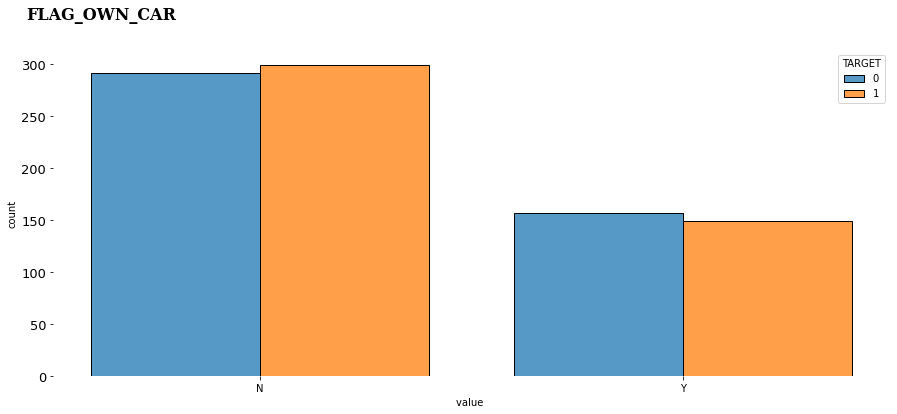

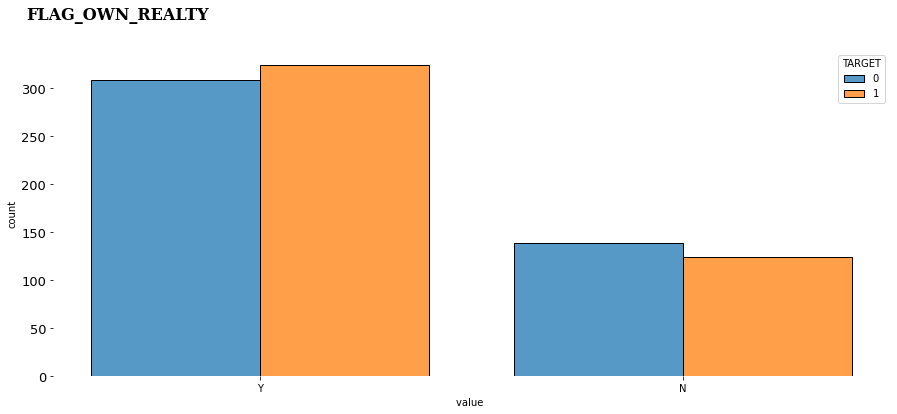

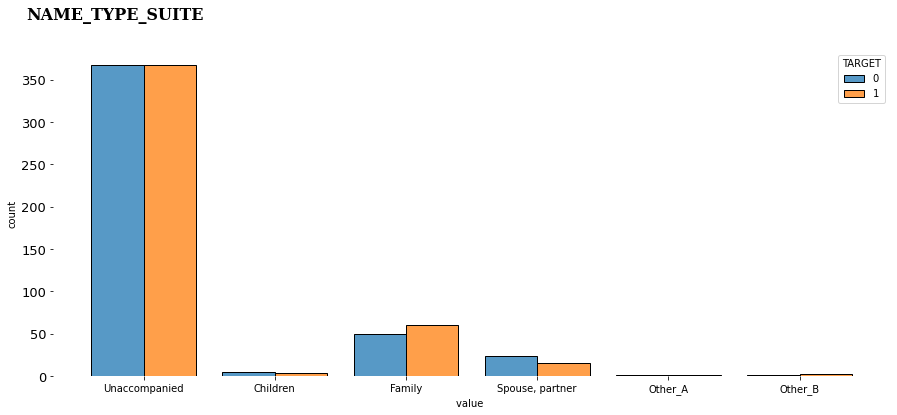

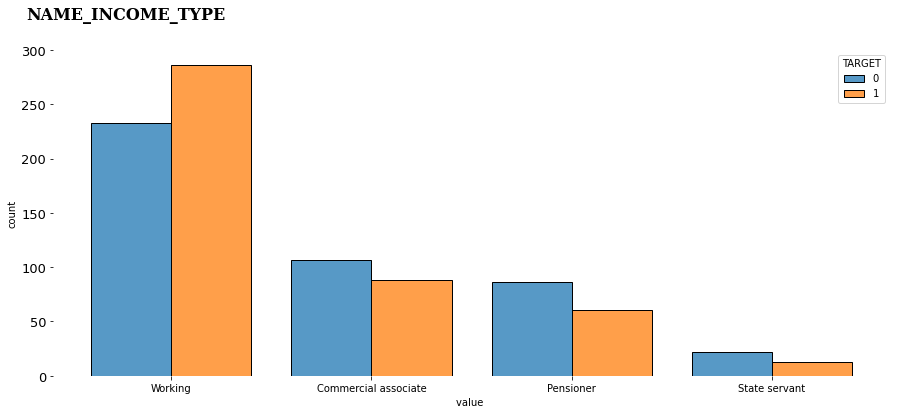

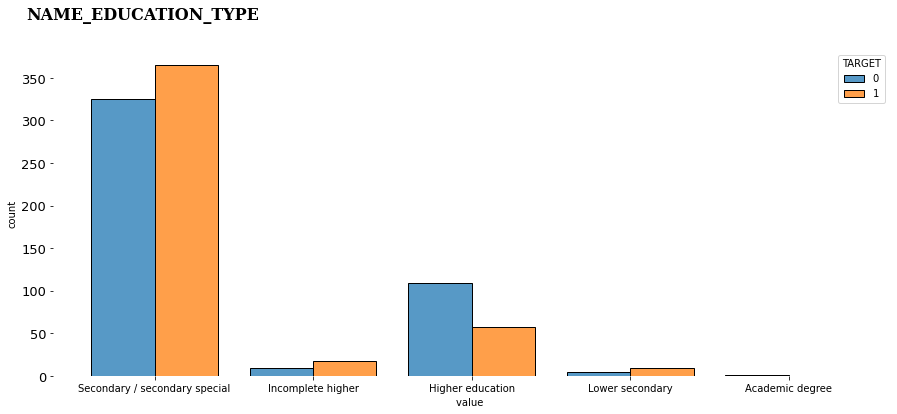

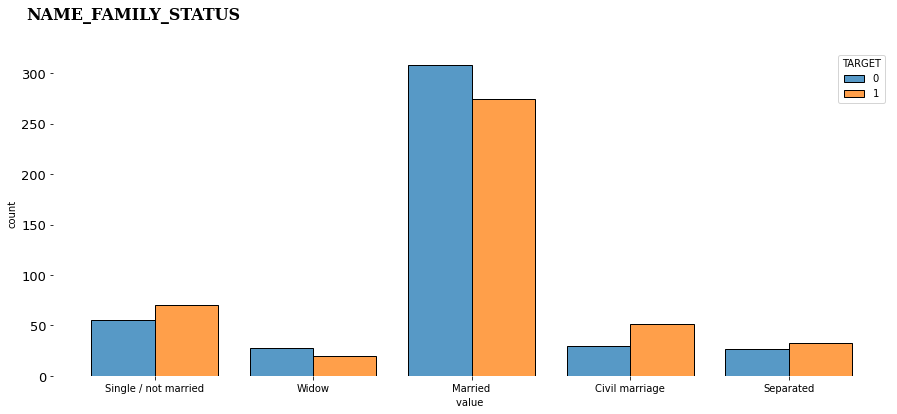

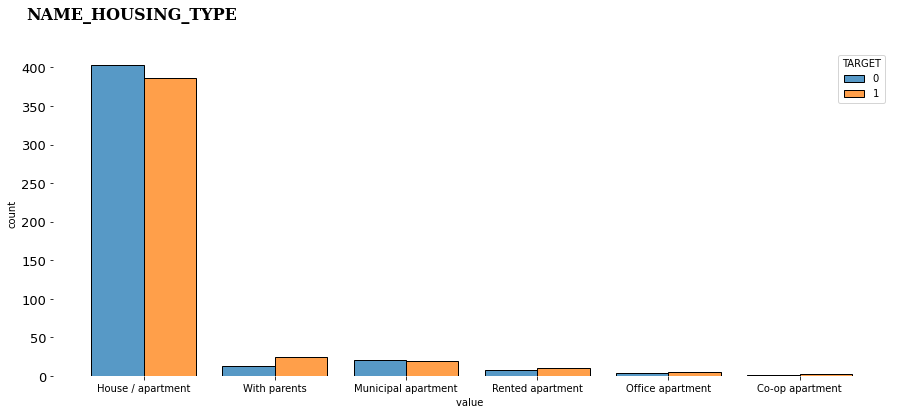

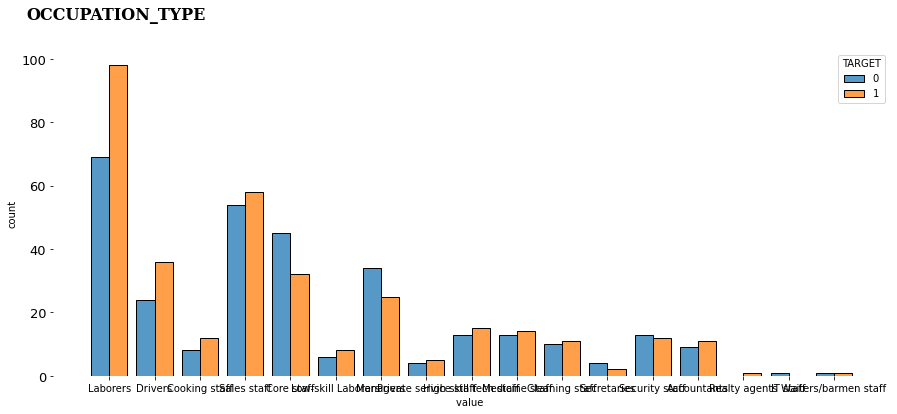

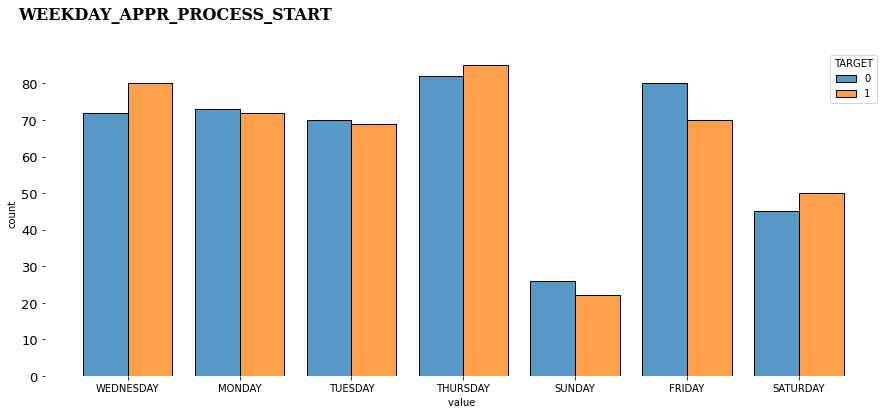

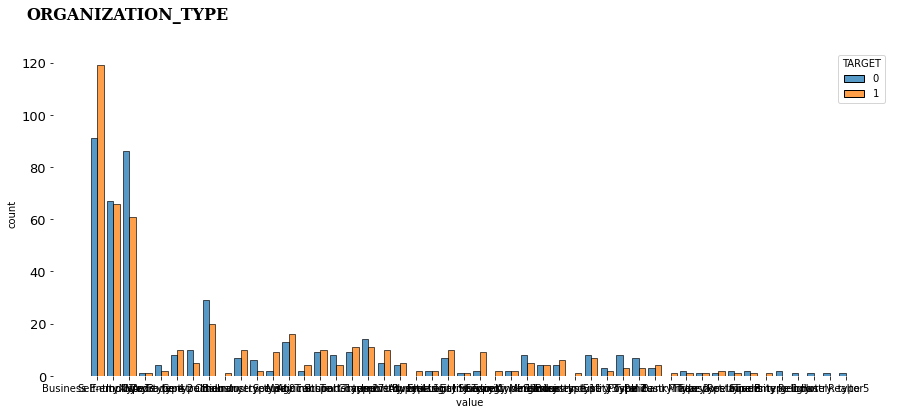

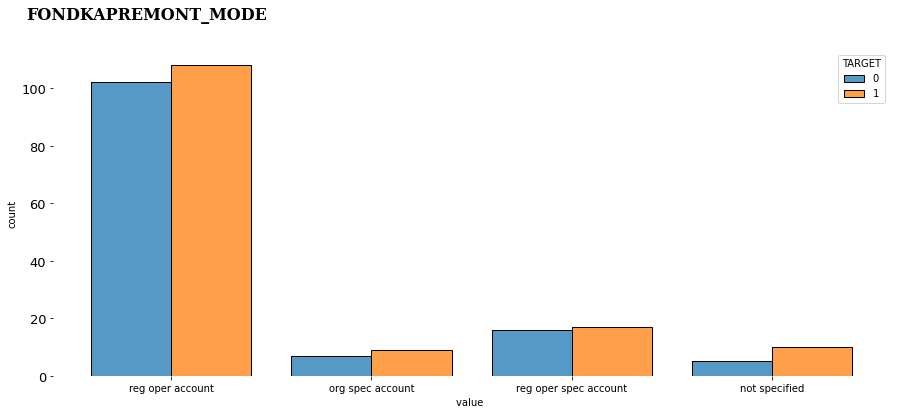

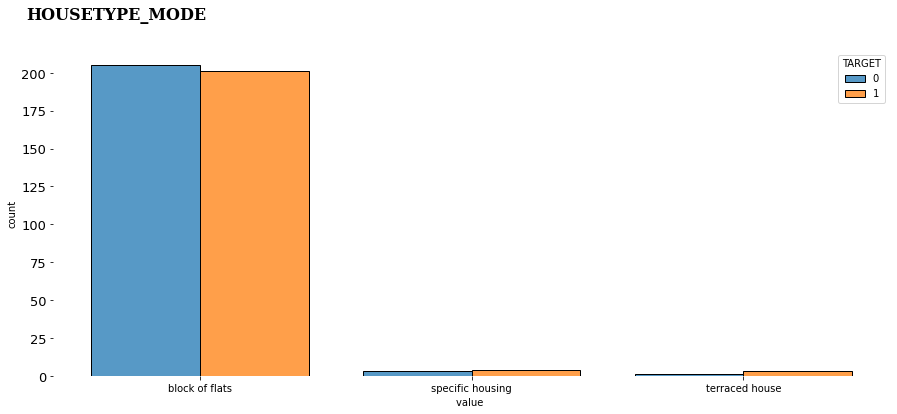

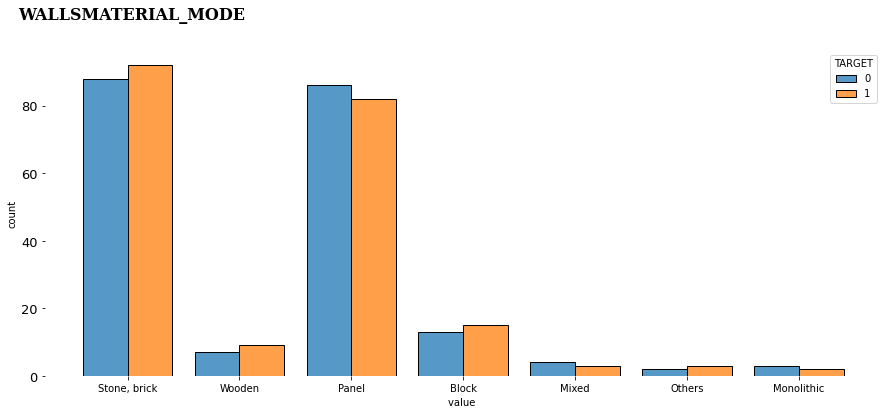

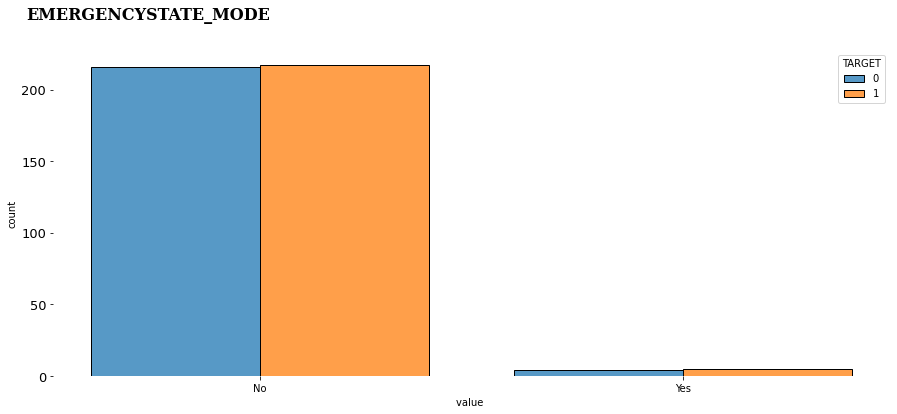

In [8]:
print("Histograms with Classes portions")
for h in traindf.select_dtypes("object").columns:
    if(traindf[h].nunique() < 100):
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.histplot(x=balanceddf[h].dropna(), hue=balanceddf["TARGET"], multiple="dodge", shrink=.8)
        fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
        plt.box(False)

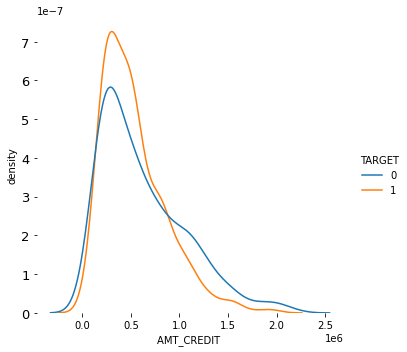

In [9]:
# Amount of credit
sns.displot(data=balanceddf, x="AMT_CREDIT", hue="TARGET", kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('AMT_CREDIT ', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

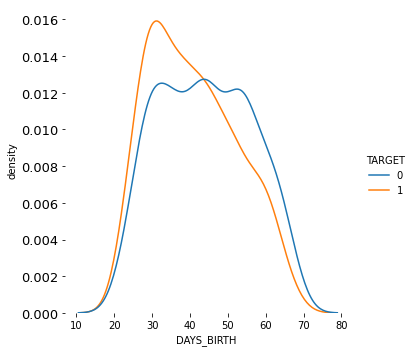

In [10]:
# Age
years = balanceddf["DAYS_BIRTH"] / -365
sns.displot(x=years, hue=balanceddf["TARGET"], kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('DAYS_BIRTH ', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)